# L06.1 Linear regression 
In the following we will explain the linear regression by using the sklearn implementation.

## Include all required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Select the data set.
### We start with the non-noisy data

In [2]:
data_set = 'clean'

if data_set == 'clean':
    data = pd.read_csv('https://raw.githubusercontent.com/lnxdxC/DSAI/main/L06_Classification_and_Regression/annual_income.csv')
else:
    data = pd.read_csv('https://raw.githubusercontent.com/lnxdxC/DSAI/main/L06_Classification_and_Regression/annual_income_noisy.csv')

X = np.array([data.x.values.tolist(), data.y.values.tolist()])

## Show the data set 
It is **important** to check (in our case visual, or using e.g. pearson correlation) that the data correlate!

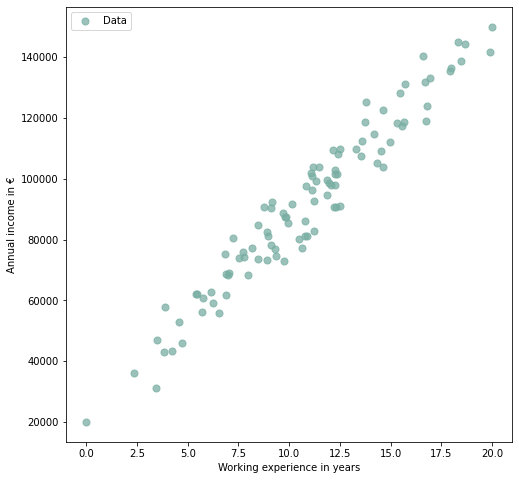

In [3]:
fig, ax = plt.subplots(figsize=(8,8))

ax.scatter(X[0,:], X[1,:], s=50, alpha=0.75, color='#79AEA3', label='Data')
ax.set_ylabel('Annual income in €')
ax.set_xlabel(r'Working experience in years')
ax.legend()
plt.show()

### Splitting the dataset into train and test data

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X[0,:], X[1,:])

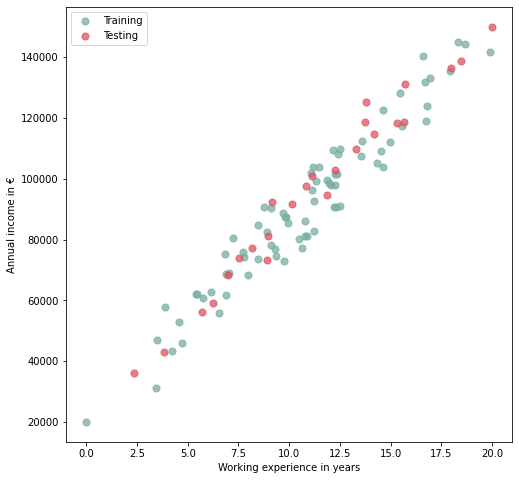

In [5]:
fig, ax = plt.subplots(figsize=(8,8))

ax.scatter(X_train, y_train, s=50, alpha=0.75, color='#79AEA3', label='Training')
ax.scatter(X_test, y_test, s=50, alpha=0.75, color='#DB5461', label='Testing')
ax.set_ylabel('Annual income in €')
ax.set_xlabel(r'Working experience in years')

ax.legend()
plt.show()

### Regression (as linear model)

In [6]:
# Instantiating LinearRegression-class
regressor = LinearRegression()

# To match the dimensions (ndim=2) required by the sklearn method, we have to reshape the data
X_train = X_train.reshape(X_train.size, 1)
y_train = y_train.reshape(y_train.size, 1)

X_test = X_test.reshape(X_test.size, 1)
y_test = y_test.reshape(y_test.size, 1)

# Training/Fitting the Model
regressor.fit(X_train, y_train) # We hold the entire model in the regressor-variable (which is an instance of the LinearRegression-class)

# Making Predictions. We hand over the independent variable and receive the dependent one (y)
prediction = regressor.predict(X_test)

### Display the model

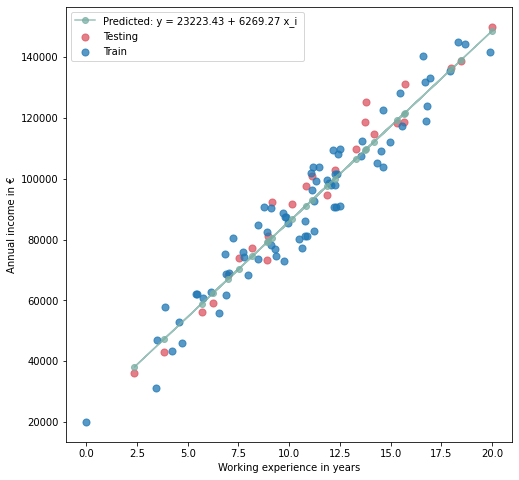

In [7]:
fig, ax = plt.subplots(figsize=(8,8))

plt.plot(X_test, prediction, alpha=0.75, color='#79AEA3', label='Predicted: ' + 'y = ' + str(round(regressor.intercept_[0],2)) + ' + ' + str(round(regressor.coef_[0,0],2)) + ' x_i ', marker='o')
plt.scatter(X_test, y_test, s=50, alpha=0.75, color='#DB5461', label='Testing')
plt.scatter(X_train, y_train, s=50, alpha=0.75, label='Train')

ax.set_ylabel('Annual income in €')
ax.set_xlabel(r'Working experience in years')

ax.legend()
plt.show()

print()

### Scoring the regression
We can use the score method to evaluate the regression. The score is equal to the R² value.

In [8]:
regressor.score(X_test, y_test)

0.9630187628662324

## Comparison to noisy data
In the following we load the noisy data and apply the identical method. We will discuss the results in the latter.

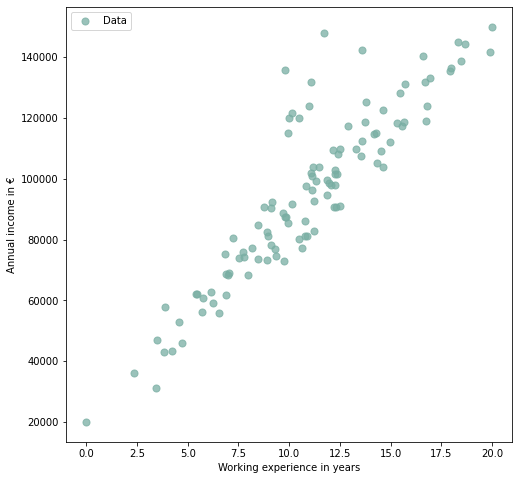

In [9]:
data = pd.read_csv('https://raw.githubusercontent.com/lnxdxC/DSAI/main/L06_Classification_and_Regression/annual_income_noisy.csv')
X = np.array([data.x.values.tolist(), data.y.values.tolist()])

# Showing the data
fig, ax = plt.subplots(figsize=(8,8))

ax.scatter(X[0,:], X[1,:], s=50, alpha=0.75, color='#79AEA3', label='Data')
ax.set_ylabel('Annual income in €')
ax.set_xlabel(r'Working experience in years')
ax.legend()
plt.show()

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X[0,:], X[1,:])

# Instantiating LinearRegression-class
regressor_noisy = LinearRegression()

# Training/Fitting the Model
regressor_noisy.fit(X_train.reshape(X_train.size, 1), y_train.reshape(y_train.size, 1))

# Making Predictions. We hand over the independent variable and receive the dependent one (y)
predection_noisy = regressor.predict(X_test.reshape(X_test.size, 1))

In [11]:
regressor_noisy.score(X_test.reshape(X_test.size, 1), y_test.reshape(y_test.size, 1))

0.9109197751301812

### Discussion

We get a worse model because of the outliers. The model is sensitive to outliers, since they are included in the learning with a factor of 1. Remedy here is a clean data cleansing at the beginning. Methods like RANSAC, Winsorizing etc. deliver good results.

### Visualization

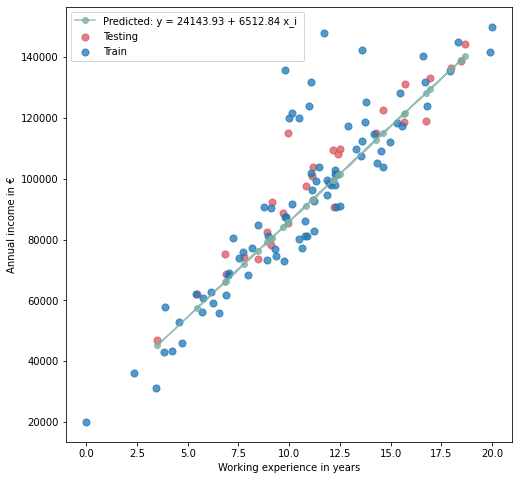

In [12]:
fig, ax = plt.subplots(figsize=(8,8))

plt.plot(X_test.reshape(X_test.size, 1), predection_noisy, alpha=0.75, color='#79AEA3', label='Predicted: ' + 'y = ' + str(round(regressor_noisy.intercept_[0],2)) + ' + ' + str(round(regressor_noisy.coef_[0,0],2)) + ' x_i ', marker='o')
plt.scatter(X_test, y_test, s=50, alpha=0.75, color='#DB5461', label='Testing')
plt.scatter(X_train, y_train, s=50, alpha=0.75, label='Train')

ax.set_ylabel('Annual income in €')
ax.set_xlabel(r'Working experience in years')

ax.legend()
plt.show()

print()

# Test the model with user input

In [13]:
print('How many years have you been working?')
in_yrs = float(input())
print('You proberly earn: %1.f € per year'% regressor.predict([[in_yrs]])[0][0])

How many years have you been working?


 123


You proberly earn: 794344 € per year
